<a href="https://colab.research.google.com/github/zhouxuan01/zhouxuan01/blob/main/Credit_Card_Users_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners (3).csv to BankChurners (3).csv


In [8]:
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
path = ('/content/BankChurners (3).csv')

In [11]:
data = pd.read_csv(path)

**1. Read basic data information**

In [12]:
data.sample()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6477,768498258,Existing Customer,47,F,1,High School,Married,abc,Blue,41,3,2,3,2950.00000,1642,1308.00000,0.80000,4740,83,0.69400,0.55700


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Attrition_Flag is the Outcome variable.
There are 5 object independent variables.  Rest are numerical variables. 

In [14]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [15]:
data.isnull().sum() / data.isnull().count() * 100

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            14.99951
Marital_Status              7.39607
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

There are 1519 missing values in Education_Level, representing about 15%, 749 missing values in Marital_Status, representing about 7%

In [16]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data_copy = data.copy()

2. **Univariate analysis of numerical columns**

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [20]:
data.describe(include = 'object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [21]:
for i in data.describe(include = 'object').columns:
  print(data[i].value_counts())
  print('*'* 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
**************************************************


In this dataset, 
Most of the data are for existing customers. 
Most of the customers are female
Most customers are graduates
Most customers are married
Most customers belongs to imcome group < 40K
Majority customers have Blue card.
There are 1112 "abc" under Income_Category.  These are also missing values

**3. Data Preprocessing**

***3.1 'CLIENTNUM' is unique ID for clients, we can drop it off***

In [22]:
data.drop(['CLIENTNUM'], axis = 1, inplace = True)

***3.2 'Attrition_Flag' is binary outcome variable.  We will replace them as number 0 and 1***

In [23]:
data['Attrition_Flag'].replace('Existing Customer', 0, inplace = True)
data['Attrition_Flag'].replace('Attrited Customer', 1, inplace = True)

**4. Exploratory Data Analysis**

***4.1 Univariate analysis***

46.33
46.0


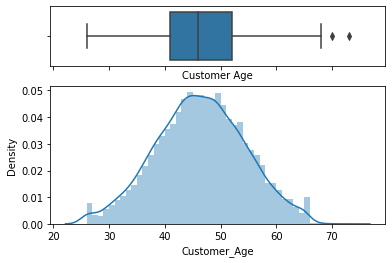

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Customer_Age'], ax = ax_box)
sns.distplot(data['Customer_Age'], ax = ax_hist)
ax_box.set(xlabel = 'Customer Age')
print(data['Customer_Age'].mean().round(2))
print(data['Customer_Age'].median().round(2))
plt.show()

*The mean and median of customer age is about 46 and the distribution of age is close to normal distribution*

35.93
36.0


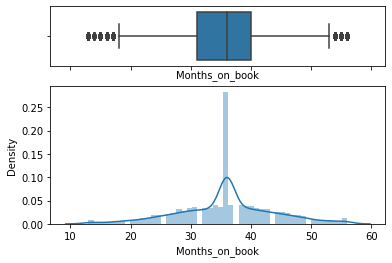

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Months_on_book'], ax = ax_box)
sns.distplot(data['Months_on_book'], ax = ax_hist)
ax_box.set(xlabel = 'Months_on_book')
print(data['Months_on_book'].mean().round(2))
print(data['Months_on_book'].median().round(2))
plt.show()

*Typical length that customes will stay with the bank is about 3 years with some outliers on both sides*

8631.95
4549.0


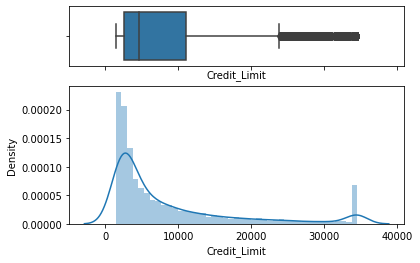

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Credit_Limit'], ax = ax_box)
sns.distplot(data['Credit_Limit'], ax = ax_hist)
ax_box.set(xlabel = 'Credit_Limit')
print(data['Credit_Limit'].mean().round(2))
print(data['Credit_Limit'].median().round(2))
plt.show()

*The distribution of Credit Limit is heavily right skewed.  The average of credit limit of all customer are at $8631, however  the  median is at $4549, which means half of the customes has less < $5000 credit limit*

1162.81
1276.0


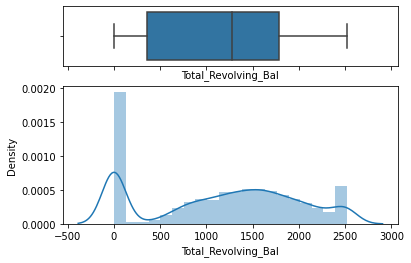

In [27]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Total_Revolving_Bal'], ax = ax_box)
sns.distplot(data['Total_Revolving_Bal'], ax = ax_hist)
ax_box.set(xlabel = 'Total_Revolving_Bal')
print(data['Total_Revolving_Bal'].mean().round(2))
print(data['Total_Revolving_Bal'].median().round(2))
plt.show()

Large amount of people will pay off the monthly balance.  
Overall average of remaining balance from all customers is about $1200 *italicized text*

7469.14
3474.0


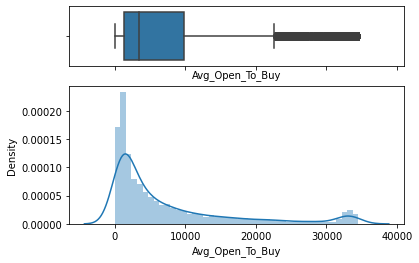

In [28]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Avg_Open_To_Buy'], ax = ax_box)
sns.distplot(data['Avg_Open_To_Buy'], ax = ax_hist)
ax_box.set(xlabel = 'Avg_Open_To_Buy')
print(data['Avg_Open_To_Buy'].mean().round(2))
print(data['Avg_Open_To_Buy'].median().round(2))
plt.show()

*This average open to buy distribution is also heavily right skewed, which means most of people used all their credit limit.*

64.86
67.0


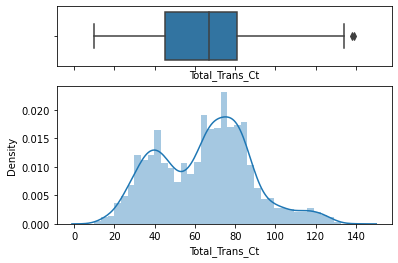

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Total_Trans_Ct'], ax = ax_box)
sns.distplot(data['Total_Trans_Ct'], ax = ax_hist)
ax_box.set(xlabel = 'Total_Trans_Ct')
print(data['Total_Trans_Ct'].mean().round(2))
print(data['Total_Trans_Ct'].median().round(2))
plt.show()

*The Total_Trans_Ct distribution plot shows one large group of people use about 40 transactions per month, and another large groupd of people use about 80 transactions per month, with average about 64 transactions overall*

0.76
0.74


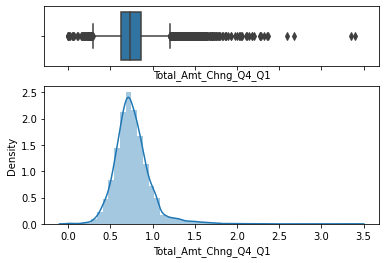

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Total_Amt_Chng_Q4_Q1'], ax = ax_box)
sns.distplot(data['Total_Amt_Chng_Q4_Q1'], ax = ax_hist)
ax_box.set(xlabel = 'Total_Amt_Chng_Q4_Q1')
print(data['Total_Amt_Chng_Q4_Q1'].mean().round(2))
print(data['Total_Amt_Chng_Q4_Q1'].median().round(2))
plt.show()

*There are many outliers for Total_Amt_Change_Q4_Q1.*

4404.09
3899.0


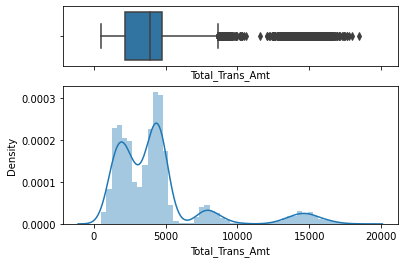

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Total_Trans_Amt'], ax = ax_box)
sns.distplot(data['Total_Trans_Amt'], ax = ax_hist)
ax_box.set(xlabel = 'Total_Trans_Amt')
print(data['Total_Trans_Amt'].mean().round(2))
print(data['Total_Trans_Amt'].median().round(2))
plt.show()

The distribution of Total_Trans_Amt is right skewed with two peaks are at around $2500 and $4500.
There are large amount of outliers of Total_Trans_Amt as well with large amount of dispense amount. *italicized text*

0.27
0.18


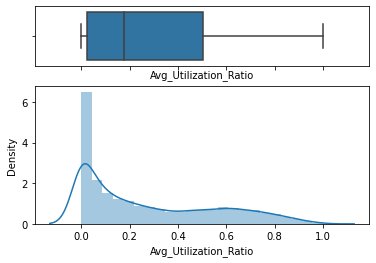

In [32]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.3, 0.7)})
sns.boxplot(data['Avg_Utilization_Ratio'], ax = ax_box)
sns.distplot(data['Avg_Utilization_Ratio'], ax = ax_hist)
ax_box.set(xlabel = 'Avg_Utilization_Ratio')
print(data['Avg_Utilization_Ratio'].mean().round(2))
print(data['Avg_Utilization_Ratio'].median().round(2))
plt.show()

*Open to buy is low from the previous plot. However average utilization ratio( 1 - (open to buy/credit limit)) is also low, which means majority of customers have low credit limits and they are not utilizing their credit cards frequently.*

***4.2 Bivariate Analysis***

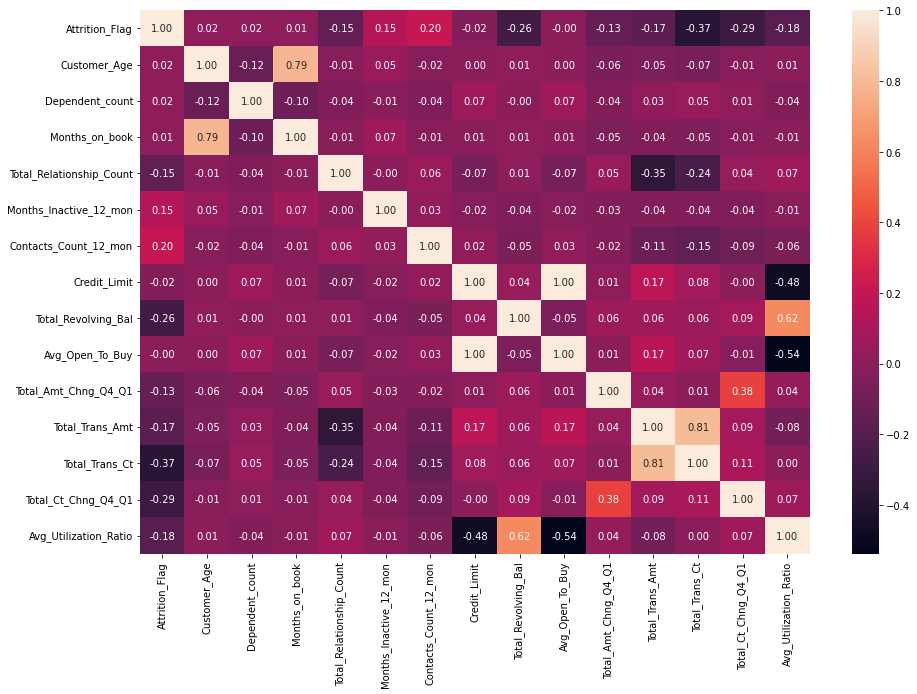

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True,fmt = '.2f')
plt.show()

From this heatmap, we can see, Total transactions, Total transaction amount have positive relationship with keeping customers
Months_on_book and Customer Age has some positive relationship
Total revolving balance and Average Utilization ratio has some positive relationship
But Average open to buy and Avg utilization ratio has negative relationship
Credit limit and average utilization ratio are negative related as well *italicized text*

***4.3 Barplot for category variables verses 'Attrition_Flag'***

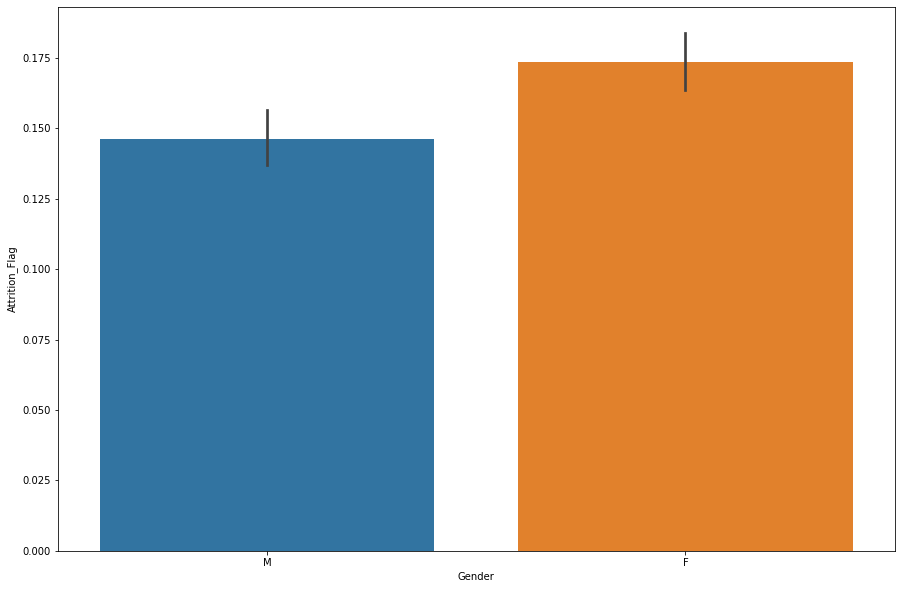

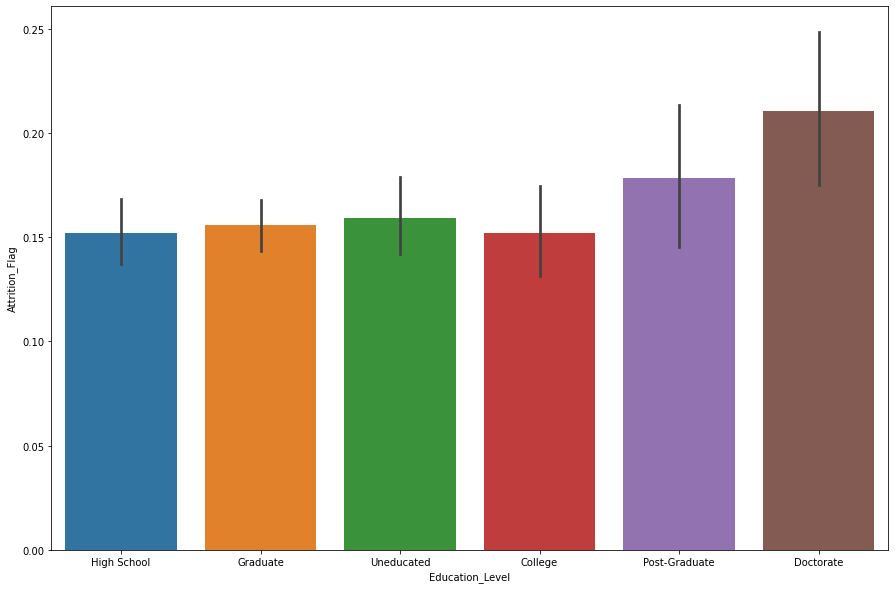

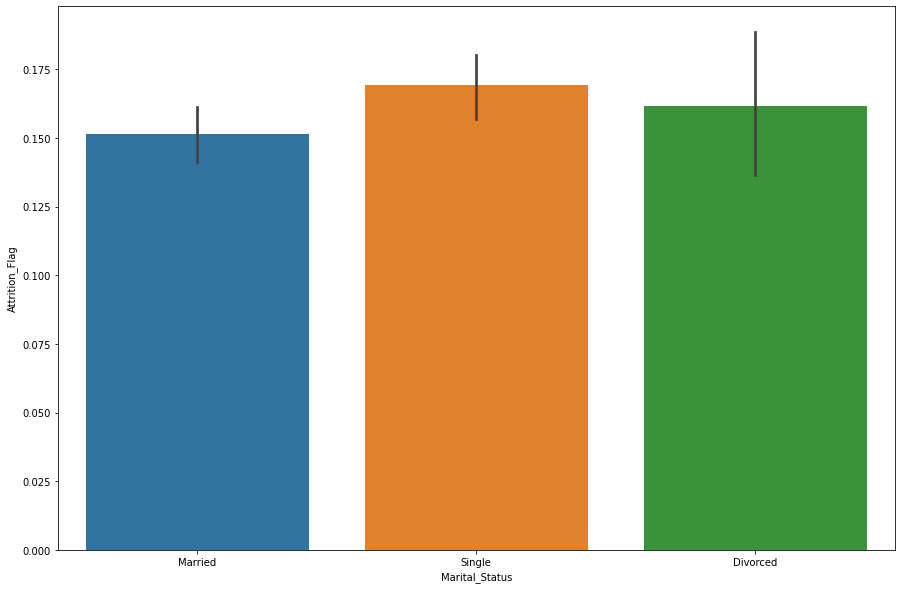

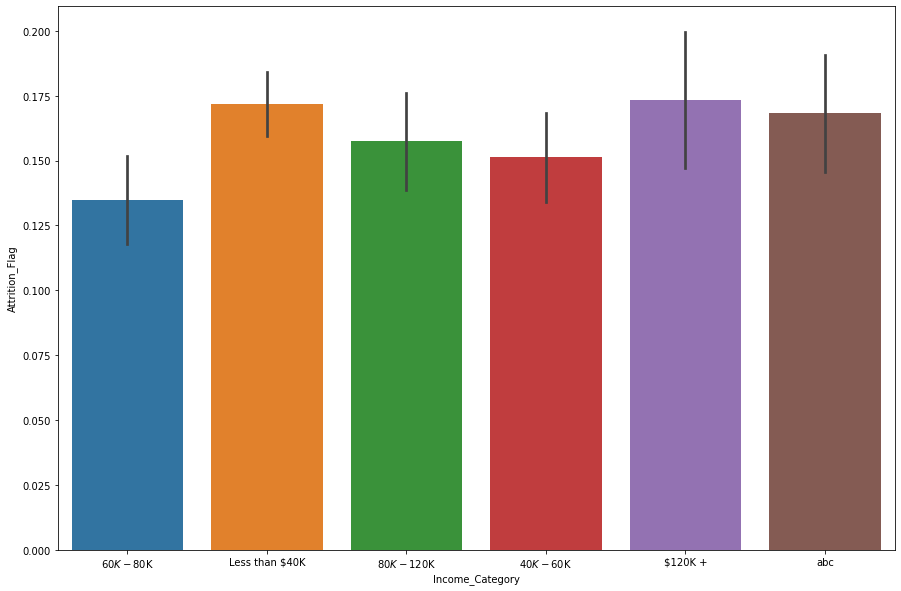

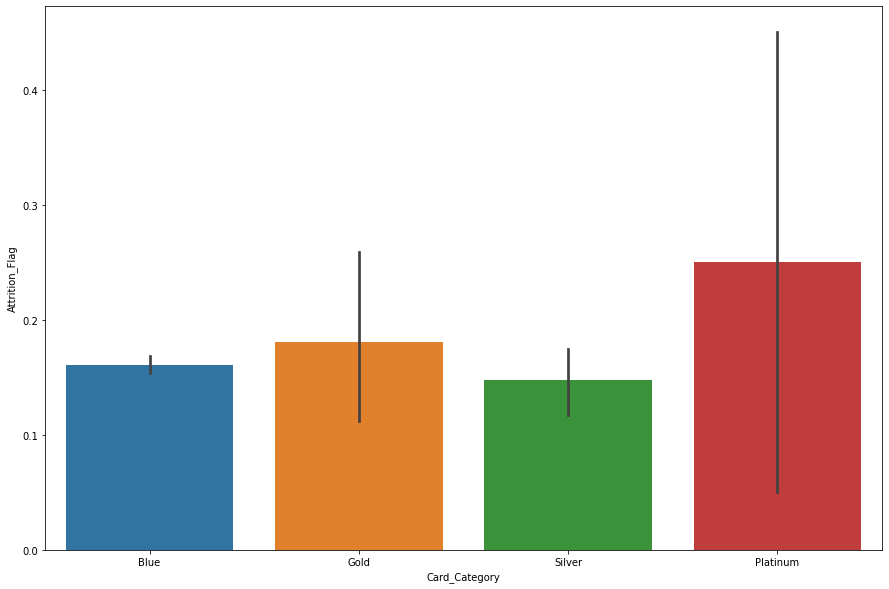

In [34]:
for i in data.describe(include = 'object').columns:
  plt.figure(figsize = (15,10))
  sns.barplot(x = data[i], y = data['Attrition_Flag'])
  plt.show()

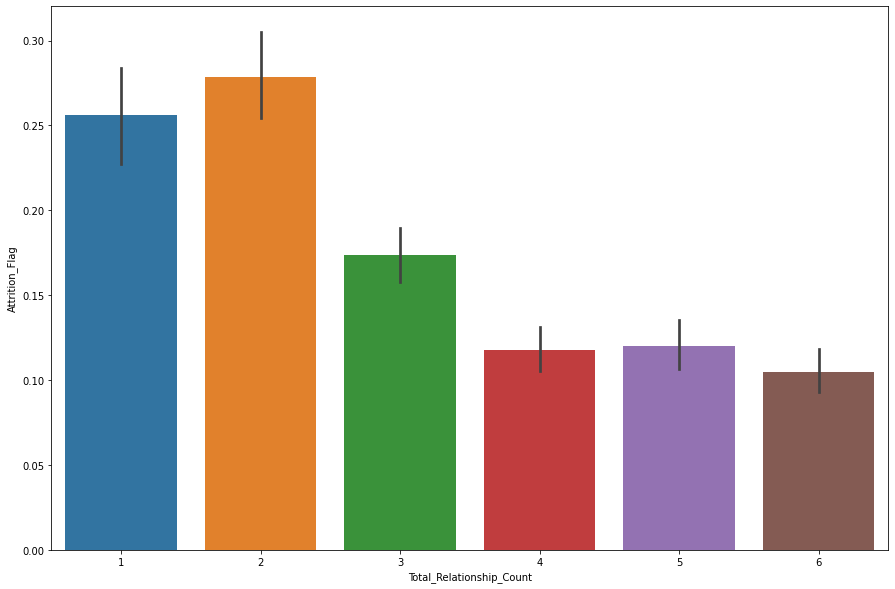

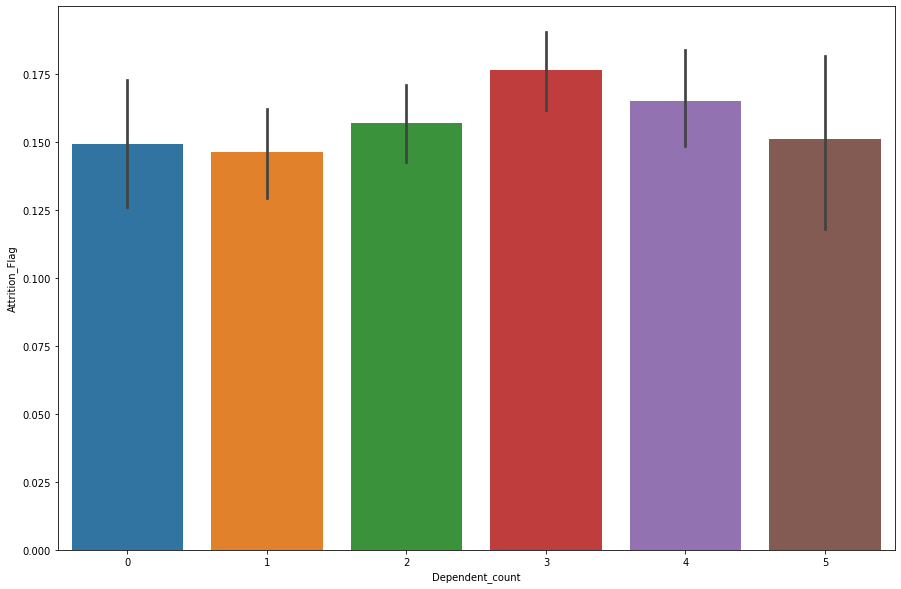

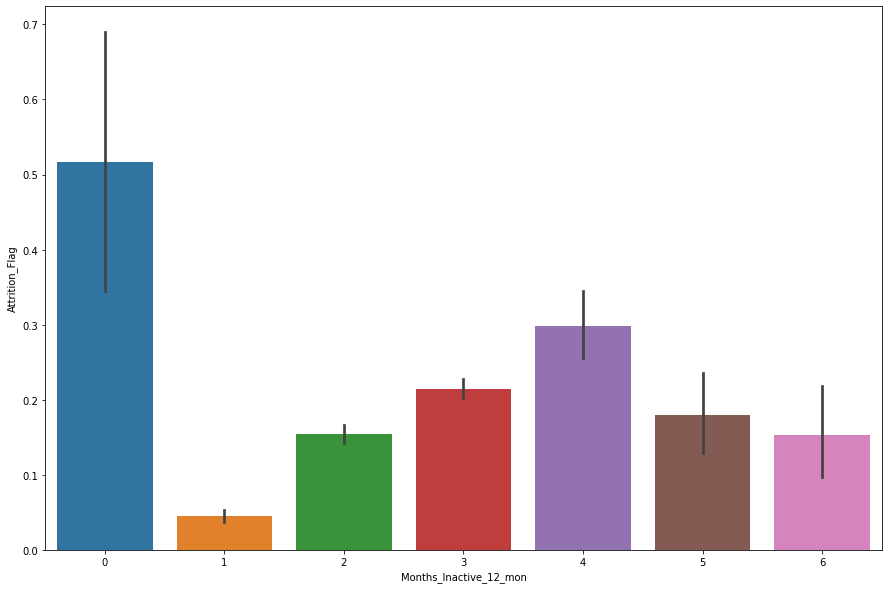

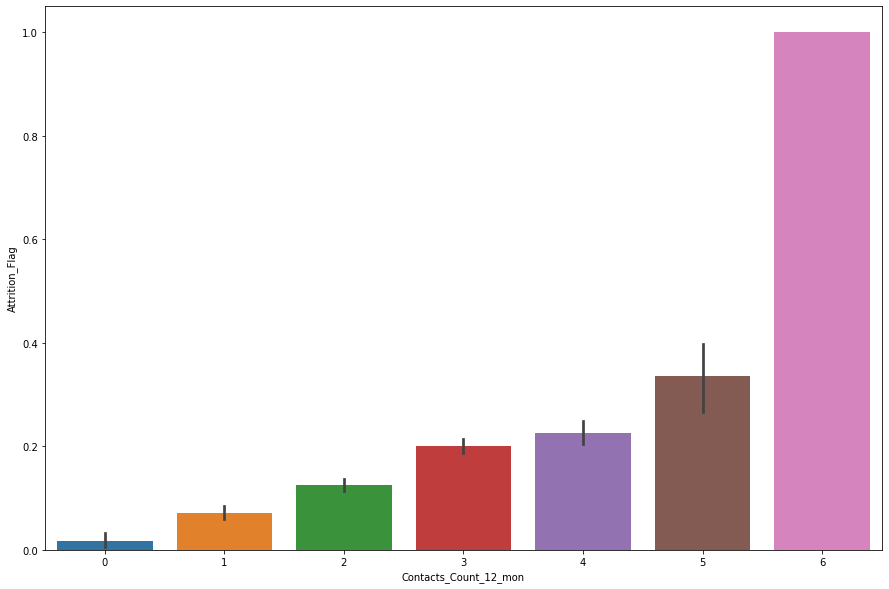

In [35]:
for i in data[['Total_Relationship_Count','Dependent_count','Months_Inactive_12_mon','Contacts_Count_12_mon']].columns:
  plt.figure(figsize = (15,10))
  sns.barplot(x = data[i], y = data['Attrition_Flag'])
  plt.show()

*From these plots, we can tell it seems customers with longer history, less inactivate month, 1-2 total_relationship_count, and higher education will have higher Attrition rate.*

**5. Missing value imputation**

we will replace 'abc' with 'np.nan' in Income_Categor

Impute missing values in Education_Level, Marital_Status and Income_Category with mode

In [36]:
data1 = data.copy()

In [37]:
data1['Income_Category'].replace('abc', np.nan, inplace = True)

***5.1 Separating Independent variables and the Dependent variable('Attrition_Flag')***

In [38]:
X = data1.drop(columns = 'Attrition_Flag', axis = 1)
y = data['Attrition_Flag']

***5.2 Spliting dataset into 70% training, 30% testing***

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

***5.3 Impute the 3 missing value columns***

In [40]:
impute_cols = ['Education_Level', 'Marital_Status', 'Income_Category']
imputer = SimpleImputer(strategy = 'most_frequent')
X_train[impute_cols] = imputer.fit_transform(X_train[impute_cols])
X_test[impute_cols] = imputer.fit_transform(X_test[impute_cols])

In [41]:
X_train.isna().sum().sum()

0

In [42]:
X_test.isna().sum().sum()

0

*By now, all the missing values are treated*

***5.4 Look at some data information on Object variable in training and test data***

In [43]:
cols = X_train.select_dtypes(include = ['object','category'])
for i in cols.columns:
  print(X_train[i].value_counts())
  print('*' * 50)

F    3770
M    3318
Name: Gender, dtype: int64
**************************************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
**************************************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
**************************************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
**************************************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
**************************************************


In [44]:
cols = X_test.select_dtypes(include = ['object','category'])
for i in cols.columns:
  print(X_test[i].value_counts())
  print('*' * 50)

F    1588
M    1451
Name: Gender, dtype: int64
**************************************************
Graduate         1400
High School       588
Uneducated        456
College           304
Post-Graduate     152
Doctorate         139
Name: Education_Level, dtype: int64
**************************************************
Married     1621
Single      1172
Divorced     246
Name: Marital_Status, dtype: int64
**************************************************
Less than $40K    1400
$40K - $60K        536
$80K - $120K       451
$60K - $80K        428
$120K +            224
Name: Income_Category, dtype: int64
**************************************************
Blue        2815
Silver       180
Gold          38
Platinum       6
Name: Card_Category, dtype: int64
**************************************************


***5.5 Encoding categorical variables***

In [45]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

**6. Model evaluation**

***6.1 Creating metric function to calculate classfication report and confusion matrix***

In [46]:
def metrics_score(actual,predicted):
  print(classification_report(actual, predicted))
  cm = confusion_matrix(actual, predicted)
  plt.figure(figsize = (8,5))
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attrite', 'Attrite'], yticklabels = ['Not Attrite', 'Attrite'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

**7. Building the model**

***7.1 Logistic Regression***

In [47]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred_train = lg.predict(X_train)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088



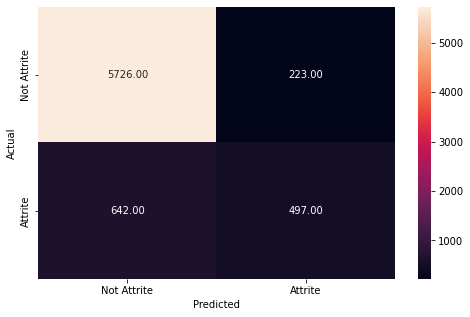

In [49]:
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039



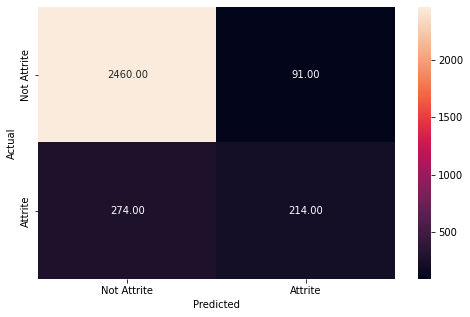

In [50]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [51]:
coef_lg = lg.coef_

In [52]:
cols = X_train.columns

In [53]:
pd.DataFrame(coef_lg, columns = cols).T.sort_values(by = 0, ascending = False)

,0
Contacts_Count_12_mon,0.31531
Months_Inactive_12_mon,0.24919
Dependent_count,0.20002
Customer_Age,0.11755
Income_Category_Less than $40K,0.05269
Marital_Status_Single,0.04579
Education_Level_Graduate,0.01085
Education_Level_Post-Graduate,0.00870
Education_Level_Doctorate,0.00737
Education_Level_Uneducated,0.00455


Contacts_Count_12_mon, Months_Inactive_12_mon, dependent_counts, customer_age etc all have positive relationship with attrition

However Total_Relationship_Count, Total_Trans_Ct, Months_on_book, Total_Ct_Chng_Q4_Q1, etc have negative affect on attrition *italicized text*

In [54]:
odds = np.exp(lg.coef_[0])

***7.2 Precision-Recall Curve for logistic regression***

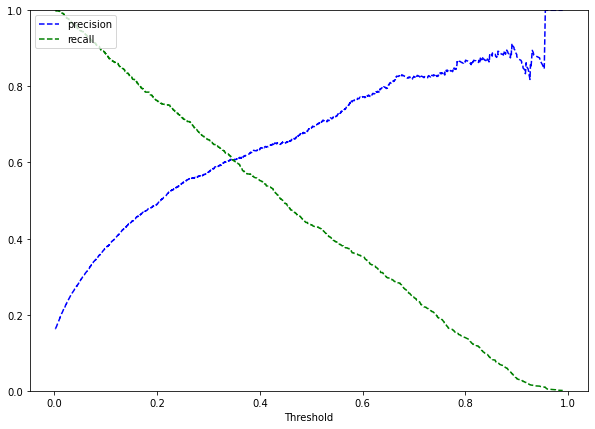

In [55]:
y_scores_lg = lg.predict_proba(X_train)
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])
plt.figure(figsize = (10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0,1])
plt.show()

In [56]:
for i in np.arange(len(thresholds_lg)):
  if precisions_lg[i] == recalls_lg[i]:
    print(thresholds_lg[i].round(2))

0.35


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5949
           1       0.61      0.60      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.76      0.77      7088
weighted avg       0.87      0.87      0.87      7088



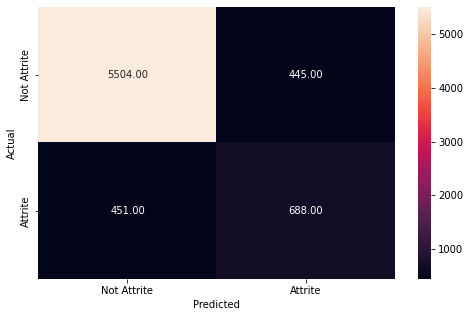

In [57]:
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1] > 0.35)

The model's performance has improved after we select the threshold

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2551
           1       0.62      0.60      0.61       488

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039



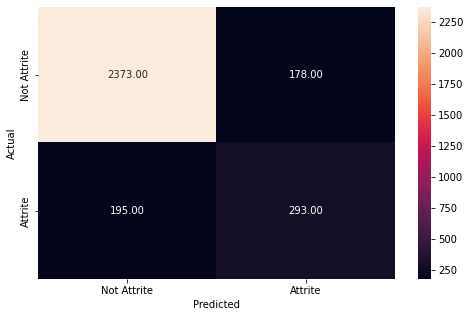

In [58]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1] > 0.35)

The recall score on testing data improved a lot

And the result of testing data and training data are very similar in general

**8. Support Vector Machines**

In [59]:
scaling = MinMaxScaler (feature_range = (-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

***8.1 Linear Kernel***

In [60]:
svm = SVC(kernel = 'linear')
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5949
           1       0.80      0.58      0.67      1139

    accuracy                           0.91      7088
   macro avg       0.86      0.77      0.81      7088
weighted avg       0.90      0.91      0.90      7088



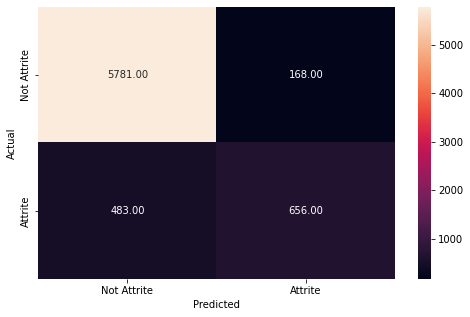

In [61]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2551
           1       0.78      0.56      0.65       488

    accuracy                           0.90      3039
   macro avg       0.85      0.76      0.80      3039
weighted avg       0.90      0.90      0.90      3039



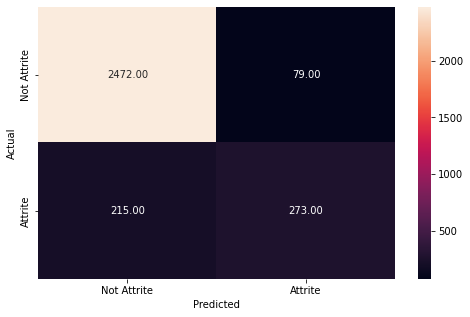

In [62]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score (y_test, y_pred_test_svm)

The SVM model of testing and training data have high (90%) of accuracy.

But the recall score is still not quite ideal.

***8.2 RBF Kernel***

In [66]:
svm_rbf = SVC(kernel = 'rbf', probability = True)

In [67]:
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

In [72]:
y_scores_svm = svm_rbf.predict_proba(X_train_scaled)

In [73]:
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

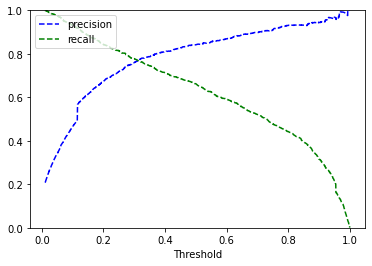

In [76]:
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label = 'precision')
plt.plot(thresholds_svm,recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0,1])
plt.show()

In [79]:
for i in np.arange(len(thresholds_svm)):
  if precisions_svm[i] == recalls_svm[i]:
    print(thresholds_svm[i].round(2))

0.31


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5949
           1       0.77      0.77      0.77      1139

    accuracy                           0.93      7088
   macro avg       0.86      0.86      0.86      7088
weighted avg       0.93      0.93      0.93      7088



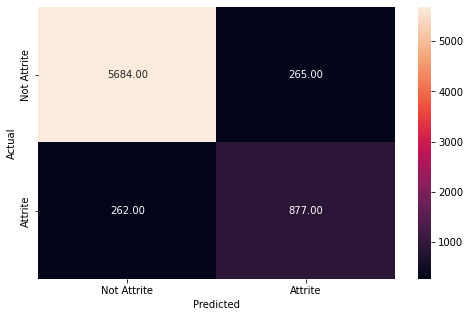

In [80]:
y_pred_train = svm_rbf.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1] > 0.31)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2551
           1       0.66      0.71      0.69       488

    accuracy                           0.90      3039
   macro avg       0.80      0.82      0.81      3039
weighted avg       0.90      0.90      0.90      3039



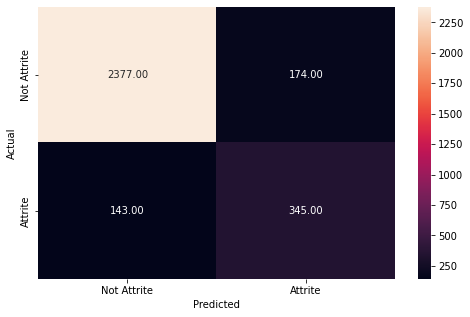

In [82]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1] > 0.31)

RBF model generate a better model with higher recall score (improved from 0.55 to 0.7)

**9. Decision Tree**

In [83]:
model = DecisionTreeClassifier(random_state = 1, max_depth = 8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5949
           1       0.93      0.92      0.93      1139

    accuracy                           0.98      7088
   macro avg       0.96      0.95      0.96      7088
weighted avg       0.98      0.98      0.98      7088



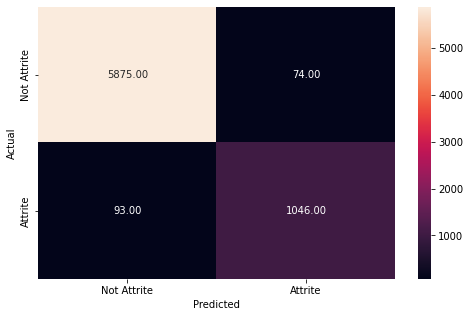

In [84]:
pred_train = model.predict(X_train)
metrics_score (y_train, pred_train)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.82      0.82      0.82       488

    accuracy                           0.94      3039
   macro avg       0.89      0.89      0.89      3039
weighted avg       0.94      0.94      0.94      3039



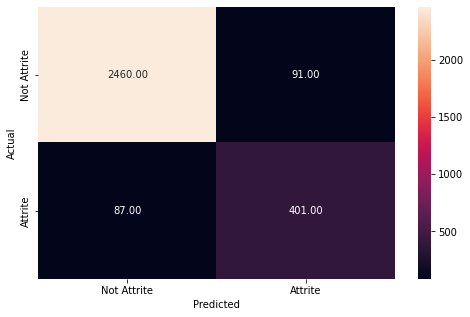

In [86]:
pred_test = model.predict(X_test)
metrics_score(y_test, pred_test)

In [87]:
features = list(X_train.columns)

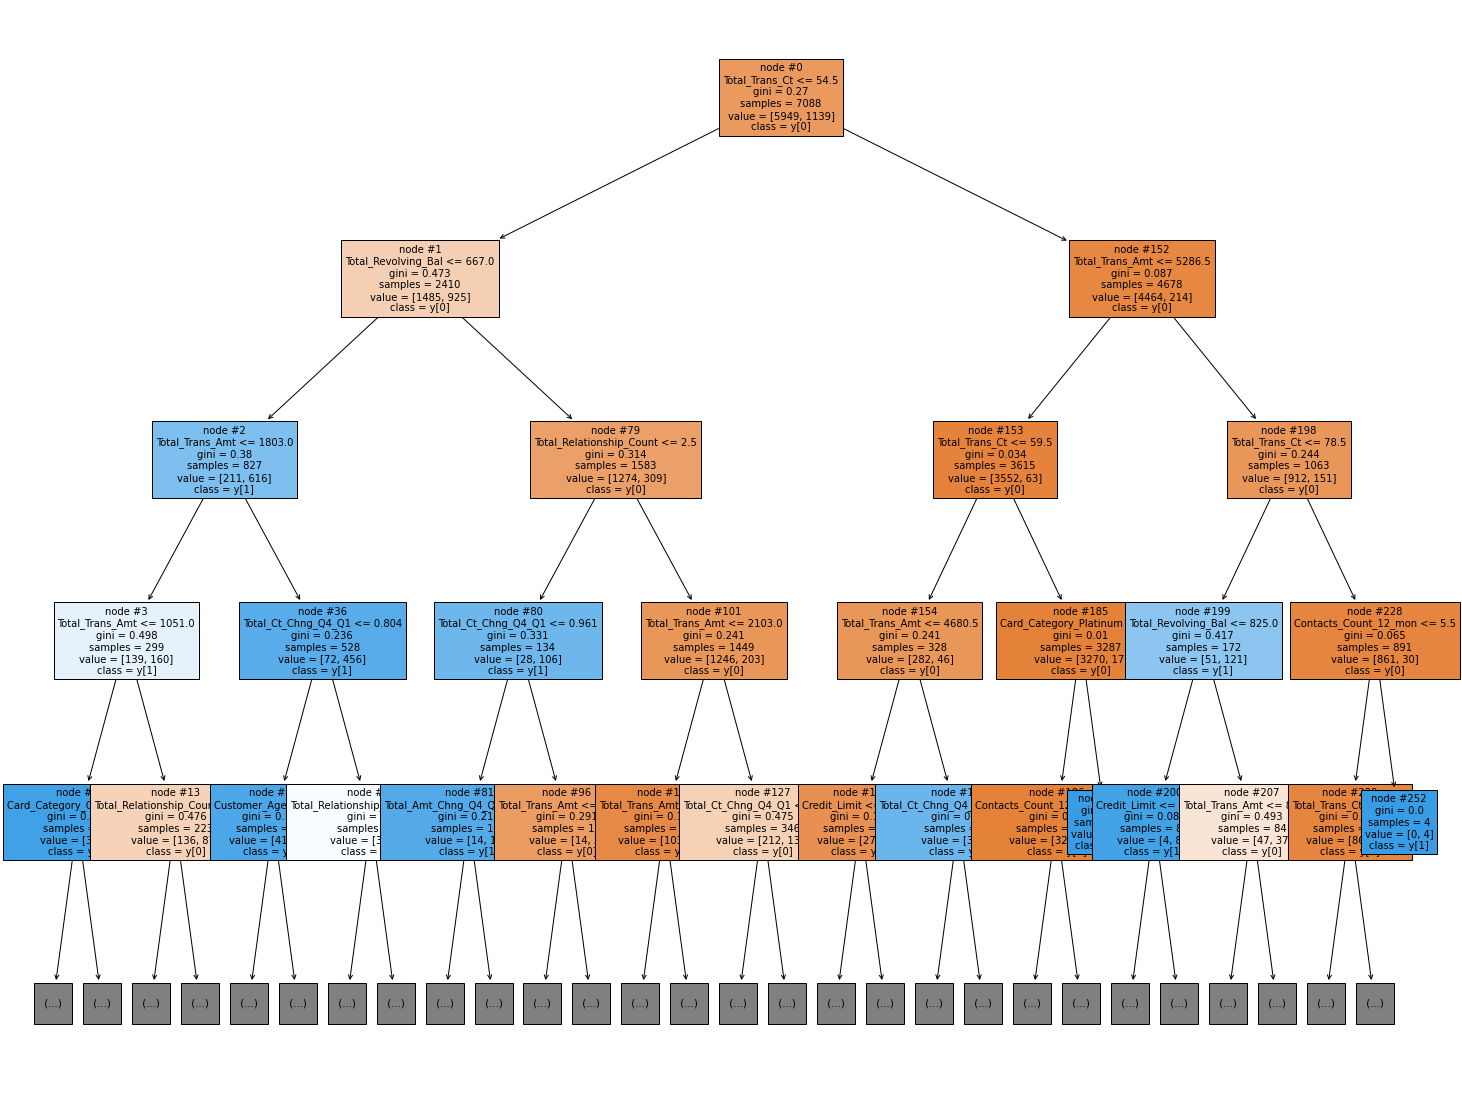

In [91]:
from sklearn import tree
plt.figure(figsize = (25,20))
tree.plot_tree(model,feature_names = features, fontsize = 10,max_depth = 4,filled = True, node_ids = True, class_names = True)
plt.show()

***9.1 Importance of features in the tree building***

In [92]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

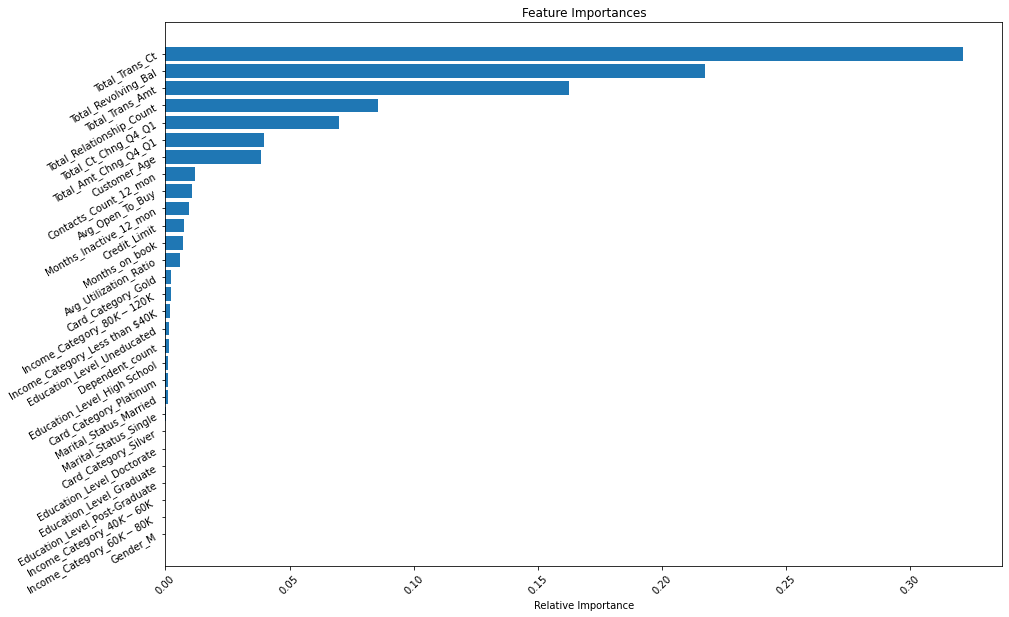

In [99]:
plt.figure(figsize = (15,10))
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.title('Feature Importances')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], rotation = 30)
plt.xticks(rotation = 45)
plt.xlabel('Relative Importance')
plt.show()

From this plot, we can tell Total_Trans_Ct is the most important features followed by Total_Revolving_Bal and Total_Trans_Amt